In [ ]:
############################### Mount Google Drive and Authenticate ###############################
print("Mounting Google Drive and Authenticate ...")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
print("Done")

Mounting Google Drive and Authenticate ...
Mounted at /content/drive
Done


#Amazfit

In [ ]:
############################### Loading ##################################
print("Loading Data ...")


# plotting different
Thefile="/content/drive/MyDrive/WearablesData/DB/AmazfitB/" # for reading db
path="/content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/" # Extracted features path

print("Done")




Loading Data ...
Done


In [ ]:
import calendar

def plot_variables_for_date(data_frame, timestamp_col, selected_date, variables, log_scale=False):
    # Convert 'TimeStamp' column to datetime format
    data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])

    # Check if selected date exists in the dataset
    if selected_date not in data_frame[timestamp_col].dt.date.unique():
        print(f"Selected date '{selected_date}' does not exist in the dataset.")
        return

    # Check if selected variables exist in the dataset
    non_existent_vars = [var for var in variables if var not in data_frame.columns]
    if non_existent_vars:
        print(f"The following variables do not exist in the dataset: {', '.join(non_existent_vars)}")
        return

    # Filter data for the selected date
    selected_data = data_frame[data_frame[timestamp_col].dt.date == selected_date]

    # Set up the plot
    fig, ax = plt.subplots(figsize=(7,5))

    # Define the colors for column bars
    num_variables = len(variables)
    colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_variables))

    # Plot column bars for the selected variables
    for i, variable in enumerate(variables):
        variable_data = selected_data[variable]
        ax.bar(variable, variable_data, align='edge', color=colors[i], width=0.7)

    # Set plot title, x-axis label, and y-axis label
    plt.title(f'{selected_date}', fontsize=12, fontweight='bold', color='black')
    plt.xlabel('Variable', fontsize=10, color='black')
    plt.ylabel('Value', fontsize=10, color='black')

    # Set log scale if requested
    if log_scale:
        ax.set_yscale('log')
        plt.ylabel('Value (Log Scale)', fontsize=10, color='black')

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()
    #plt.savefig(path+ plt.title+'.png')


def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct, v=val)
    return my_format

def plot_sleep_time_distribution_sleep(data, month=None):
    # Set the light background style
    sns.set_style("whitegrid")
    if month:
        if month not in data['Month'].unique():
            print(f"Month {month} doesn't exist in the dataset.")
            return
        data = data[data['Month'] == month]
    #sleep_time_components = data[['DeepSleepTime', 'LightSleepTime', 'SleepDreamTime']].sum()
    sleep_time_components = data[['nonRemTime', 'remTime']].sum()

    labels = sleep_time_components.index
    sizes = sleep_time_components.values
    plt.figure(figsize=(8, 8))
    colors = ['#4C72B0', '#55A868', '#C44E52']  # Custom color palette for the light theme
    # Add shadow and gradient effect to the pie chart
    pie = plt.pie(sizes, autopct=autopct_format(sizes), startangle=140, colors=colors, textprops={'fontsize': 12})
    plt.setp(pie[0], edgecolor='white', linewidth=1)
    plt.gca().add_artist(plt.Circle((0, 0), 0.6, color='white'))
    if month:
        month_name = pd.to_datetime(str(month), format='%m').strftime('%B')
        season = get_season(month)
        #plt.title(f'Distribution of All Sleep Time across Its Components for {month_name} ({season})', fontsize=18, fontweight='bold', color='black')
    #else:
        #plt.title('Distribution of All Sleep Time across Its Components for the Whole Dataset', fontsize=18, fontweight='bold', color='black')
    # Adjust legend style with a shadow effect
    legend = plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 0.8), title='Sleep Components', fontsize=14, title_fontsize=14)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

def plot_yearly_calendar_heatmap(data, variable):
    sns.set(style='dark')
    # Convert "TimeStamp" column to datetime object
    data['dayTimestamp'] = pd.to_datetime(data['dayTimestamp'])
    data['Year'] = data['dayTimestamp'].dt.year
    data['Month'] = data['dayTimestamp'].dt.month
    # Pivot the data to create a matrix with months as columns, years as rows, and values as the specified variable
    pivot_data = data.pivot_table(values=variable, index='Year', columns='Month', aggfunc='mean')
    # Reindex the pivot table columns to ensure correct ordering
    pivot_data = pivot_data.reindex(columns=range(1, 13))
    # Create a heatmap with Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': variable})
    #plt.title(f'Yearly Calendar Heatmap for {variable}', fontsize=18, fontweight='bold')
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Year', fontsize=14)
    # Set custom x-axis and y-axis labels for months and years
    month_labels = calendar.month_abbr[1:]  # Abbreviated month names (Jan, Feb, Mar, ...)
    year_labels = pivot_data.index.astype(str)
    # Adjust x-axis tick positions by adding half a step
    plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=month_labels, rotation=0, ha='center', fontsize=10)
    plt.yticks(ticks=list(range(len(year_labels))), labels=year_labels, fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_time_series_sleep(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column
    # Convert 'TimeStamp' column to datetime format
    data['dayTimestamp'] = pd.to_datetime(data['dayTimestamp'])
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    color_cycle = plt.cm.tab20c.colors
    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        ax.plot(data['dayTimestamp'], data[variable], label=variable, color=color, linewidth=2)
    # Set plot title, x-axis label, and y-axis label
    #plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('TimeStamp', fontsize=14, color='black')
    plt.ylabel('Value', fontsize=14, color='black')
    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)
    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')
    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()

def plot_time_series_sleep2(data, variables=None):
    # If no specific variables are provided, plot all variables
    if variables is None:
        variables = data.columns[1:]  # Exclude the 'TimeStamp' column

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    # Set a custom color cycle for better visualization of multiple lines
    color_cycle = plt.cm.tab20.colors

    # Filter available dates based on available data
    available_dates = data['dayTimestamp']

    # Plot time series for each variable
    for i, variable in enumerate(variables):
        color = color_cycle[i % len(color_cycle)]
        variable_data = data[data['dayTimestamp'].isin(available_dates)][variable]
        ax.plot(available_dates, variable_data, label=variable, color=color, linewidth=2)

        # If only one variable is being plotted, calculate and plot the mean
        if len(variables) == 1:
            variable_mean = variable_data.mean()
            ax.axhline(y=variable_mean, color=color, linestyle='--', label=f'{variable} Mean')

    # Set plot title, x-axis label, and y-axis label
    plt.title('Time Series for Sleep Variables', fontsize=18, fontweight='bold', color='black')
    plt.xlabel('TimeStamp', fontsize=14, color='black')
    plt.ylabel('Value', fontsize=14, color='black')

    # Move the legend to the right side of the plot
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

    # Customize the grid appearance
    plt.grid(True, linestyle='--', alpha=0.7)

    # Set the background color
    plt.gca().set_facecolor('#f0f0f0')

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import json

database_filenames = [
    'HMCorePersistanceDatabaseV1.sqlite.db',
    '5079068576_spo2.sqlite.db',
    'HMDBFirstBeatDataBaseV2.sqlite.db'
]

tables_dict = {}

for filename in database_filenames:
    try:
        conn = sqlite3.connect(Thefile+filename)

        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        table_names = cursor.fetchall()

        for table_name in table_names:
            table_name = table_name[0]
            query = f"SELECT * FROM {table_name};"
            table_df = pd.read_sql_query(query, conn)
            tables_dict[table_name] = table_df
        conn.close()
    except sqlite3.Error as e:
        print(f"Error while working with {filename}: {e}")

#TABLES

In [ ]:
tables_dict.keys()

dict_keys(['familyMember', 'sqlite_sequence', 'scaleWeight', 'flagTable', 'activitySummary', 'stepStage', 'chopinActivitySummary', 'sleepStage', 'chopinSleepStage', 'activityRawData', 'vibrationConfigs', 'eventReminder', 'onlineFirmwareConfig', 'onlineFirmwares', 'stepGoal', 'heartRate', 'PressureRateTable', 'stepActivityStage', 'weightTarget', 'abnormalHeartRate', 'sleepFeeling', 'rrPeakData', 'ecgUpload', 'friendMessage', 'friendList', 'ClickSPO2', 'OsaSPO2', 'ODI', 'SPO2DownloadRecord', 'OsaSPO2_original', 'OsaSPO2Decrease_original', 'OsaSPO2Decrease', 'device_pai_v2', 'device_api_score', 'device_api_future_score'])

#Sleep

##

In [ ]:
# print(sleep_data.columns)


In [ ]:
sleep_data = tables_dict["activitySummary"]
sleep_data = sleep_data[["dayTimestamp",	"remTime","nonRemTime","awakeTime",	"dreamDuration","sleepScore","awakeCount","sleepTimeLastNight","wakeTimeTodayMorning","correctedWakeTimeTodayMorning","intoSleepTime","lazyBedTime","noSleepReason","onBedTime","offBedTime"]]

In [ ]:

from datetime import datetime
import datetime


In [ ]:
timestamp = sleep_data['dayTimestamp']
converted_timestamps = timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
sleep_data['dayTimestamp']= converted_timestamps
sleep_data['dayTimestamp'] = sleep_data['dayTimestamp'].dt.strftime('%Y-%m-%d')


<ipython-input-9-4ba2a0563740>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['dayTimestamp']= converted_timestamps
<ipython-input-9-4ba2a0563740>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sleep_data['dayTimestamp'] = sleep_data['dayTimestamp'].dt.strftime('%Y-%m-%d')


In [ ]:
print(sleep_data)

  dayTimestamp  remTime  nonRemTime  awakeTime  dreamDuration  sleepScore  \
0   2023-07-09        0           0          0              0           0   
1   2023-07-10      393         136         23             73          72   
2   2023-07-11      279          70          0             24          84   
3   2023-07-12      344         100          0             31          88   
4   2023-07-13      285          88          0             62          86   
5   2023-07-14      277         106         33             46          81   
6   2023-07-16      263          98         20            100          78   
7   2023-07-15      188          62          0             48          73   

   awakeCount  sleepTimeLastNight  wakeTimeTodayMorning  \
0           0         -2147483648           -2147483648   
1           3                   7                   632   
2           0                  50                   423   
3           0                 126                   601   
4          

In [ ]:
sleep_data=sleep_data[(sleep_data['remTime'] != 0) | (sleep_data['nonRemTime'] != 0)| (sleep_data['awakeTime'] != 0)| (sleep_data['dreamDuration'] != 0)]
sleep_data = sleep_data.sort_values(by="dayTimestamp")

print(sleep_data)

  dayTimestamp  remTime  nonRemTime  awakeTime  dreamDuration  sleepScore  \
1   2023-07-10      393         136         23             73          72   
2   2023-07-11      279          70          0             24          84   
3   2023-07-12      344         100          0             31          88   
4   2023-07-13      285          88          0             62          86   
5   2023-07-14      277         106         33             46          81   
7   2023-07-15      188          62          0             48          73   
6   2023-07-16      263          98         20            100          78   

   awakeCount  sleepTimeLastNight  wakeTimeTodayMorning  \
1           3                   7                   632   
2           0                  50                   423   
3           0                 126                   601   
4           0                 258                   693   
5           1                  86                   548   
7           0                

## Exporting

In [ ]:
# Export data as CSV
f="Sleep"

csv_filename = path + f +"_data.csv"
sleep_data.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Sleep data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/Sleep_data.csv


## Blotting

In [ ]:
import seaborn as sns


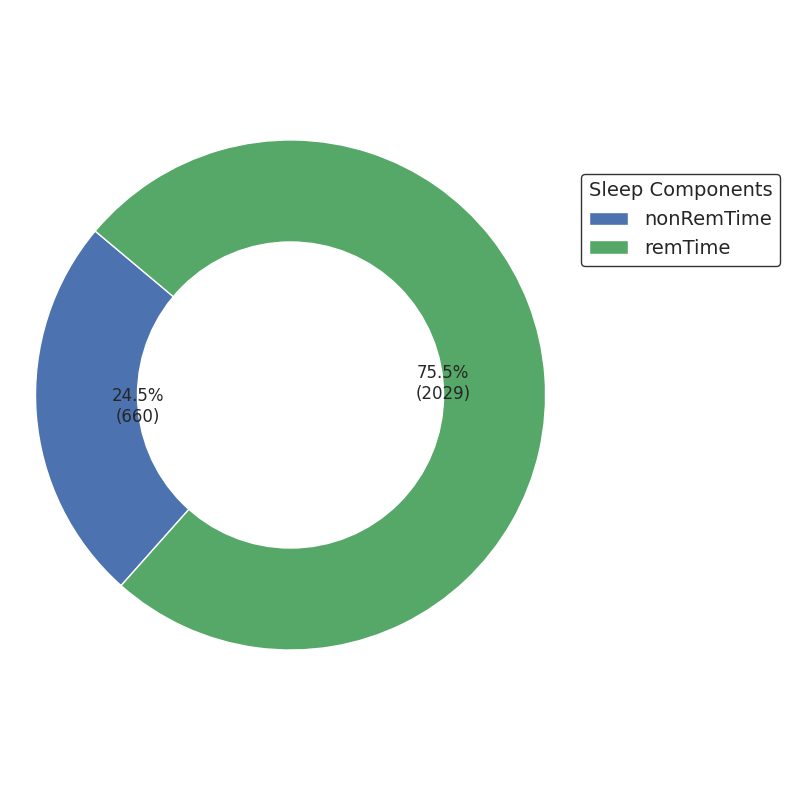

In [ ]:
sleep_data['dayTimestamp'] = pd.to_datetime(sleep_data['dayTimestamp'])  # Convert "TimeStamp" column to datetime object
sleep_data['Month'] = sleep_data['dayTimestamp'].dt.month
# Plot for the whole dataset

plot_sleep_time_distribution_sleep(sleep_data)

In [ ]:
sleep_data

,dayTimestamp,remTime,nonRemTime,awakeTime,dreamDuration,sleepScore,awakeCount,sleepTimeLastNight,wakeTimeTodayMorning,correctedWakeTimeTodayMorning,intoSleepTime,lazyBedTime,noSleepReason,onBedTime,offBedTime,Month
1,2023-07-10,393,136,23,73,72,3,7,632,-2147483648,7,4,0,0,636,7
2,2023-07-11,279,70,0,24,84,0,50,423,-2147483648,10,6,0,40,429,7
3,2023-07-12,344,100,0,31,88,0,126,601,-2147483648,8,1,0,118,602,7
4,2023-07-13,285,88,0,62,86,0,258,693,-2147483648,18,5,0,240,698,7
5,2023-07-14,277,106,33,46,81,1,86,548,-2147483648,6,1,0,80,549,7
7,2023-07-15,188,62,0,48,73,0,263,561,-2147483648,10,5,0,253,566,7
6,2023-07-16,263,98,20,100,78,2,151,632,-2147483648,29,1,0,122,633,7


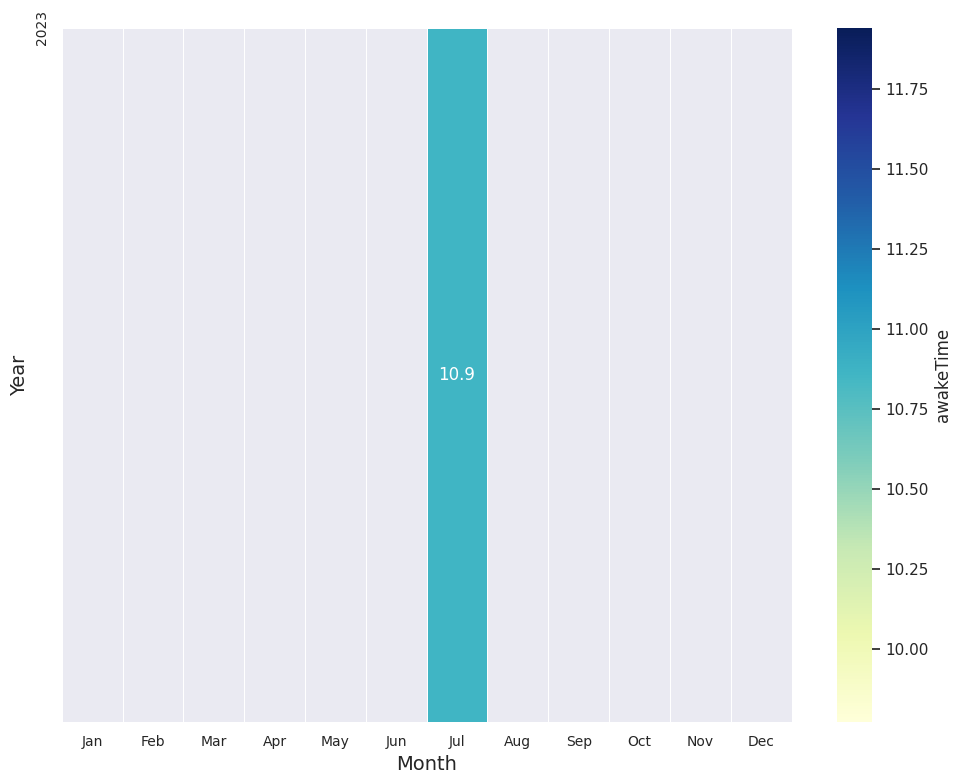

In [ ]:
plot_yearly_calendar_heatmap(sleep_data, 'awakeTime')


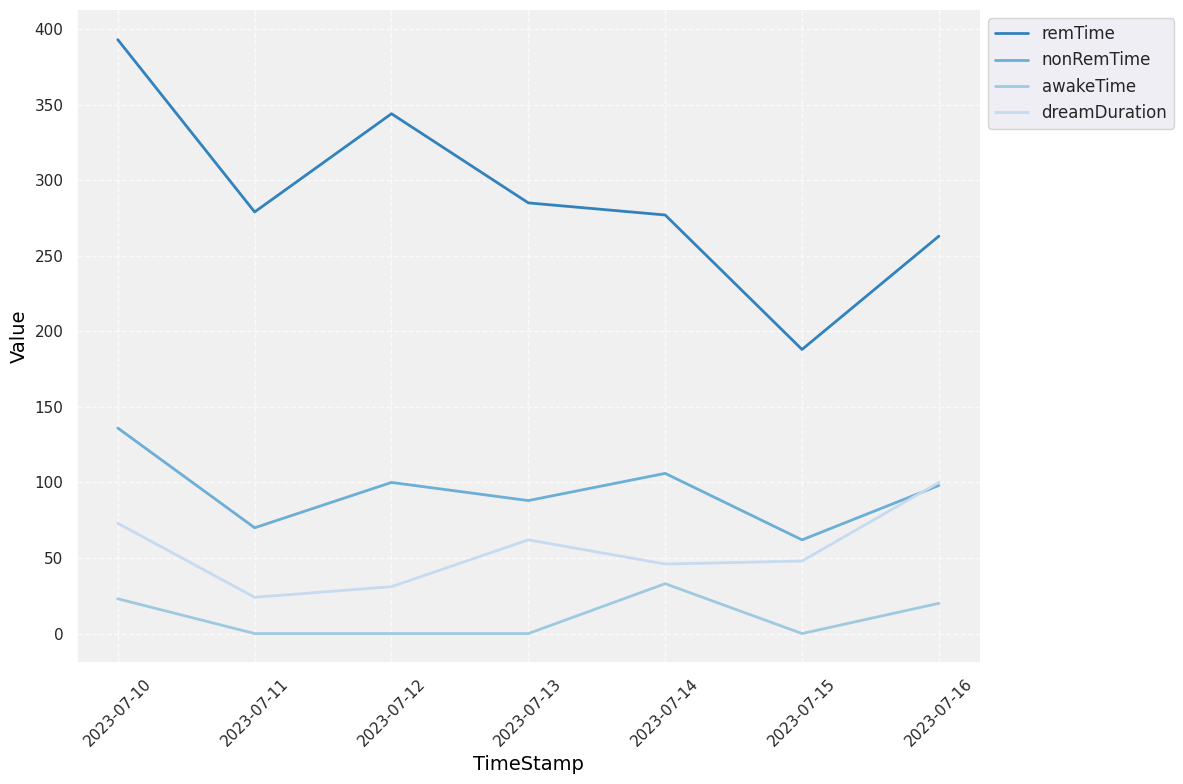

In [ ]:
#Remove zero values
#sleep_data=sleep_data[(sleep_data['remTime'] != 0) & (sleep_data['nonRemTime'] != 0)& (sleep_data['awakeTime'] != 0)& (sleep_data['dreamDuration'] != 0)]
plot_time_series_sleep(sleep_data, ['remTime', 'nonRemTime','awakeTime','dreamDuration'])


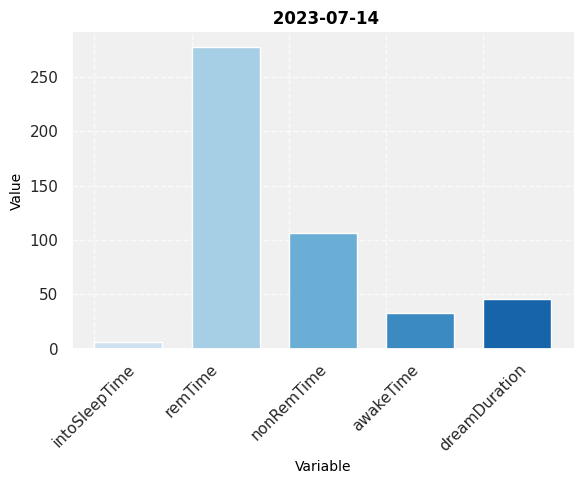

In [ ]:
selected_date = pd.to_datetime('2023-07-14').date()  # Replace with the date you want to plot
variables_to_plot = ['intoSleepTime','remTime', 'nonRemTime','awakeTime','dreamDuration'] # Replace with the vars you want to plot
import numpy as np

plot_variables_for_date(sleep_data, timestamp_col='dayTimestamp', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

# PAI

##dailyPAI

In [ ]:
device_pai_v2 = tables_dict["device_pai_v2"]
device_pai_v2 = device_pai_v2[["timestamp","dailyPAI","totalPAI"]]
device_pai_v2['timestamp'] = pd.to_datetime(device_pai_v2['timestamp'], unit='s')
device_pai_v2['timestamp'] = pd.to_datetime(device_pai_v2['timestamp'])
device_pai_v2['timestamp'] = device_pai_v2['timestamp'].dt.strftime('%Y-%m-%d')

<ipython-input-19-ce3525b0facf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_pai_v2['timestamp'] = pd.to_datetime(device_pai_v2['timestamp'], unit='s')
<ipython-input-19-ce3525b0facf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  device_pai_v2['timestamp'] = pd.to_datetime(device_pai_v2['timestamp'])
<ipython-input-19-ce3525b0facf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
device_pai_v2

,timestamp,dailyPAI,totalPAI
0,2023-07-09,0.869891,0.869891
1,2023-07-10,11.006727,11.876618
2,2023-07-11,6.960378,18.836996
3,2023-07-12,4.361761,23.198757
4,2023-07-13,4.084358,27.283115
5,2023-07-14,1.018597,28.301712
6,2023-07-15,2.593580,30.895292
7,2023-07-16,6.785049,36.857838


## Exporting PAI

In [ ]:
# Export data as CSV
f="PAI"

csv_filename = path + f +"_data.csv"
device_pai_v2.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported PAI data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/PAI_data.csv


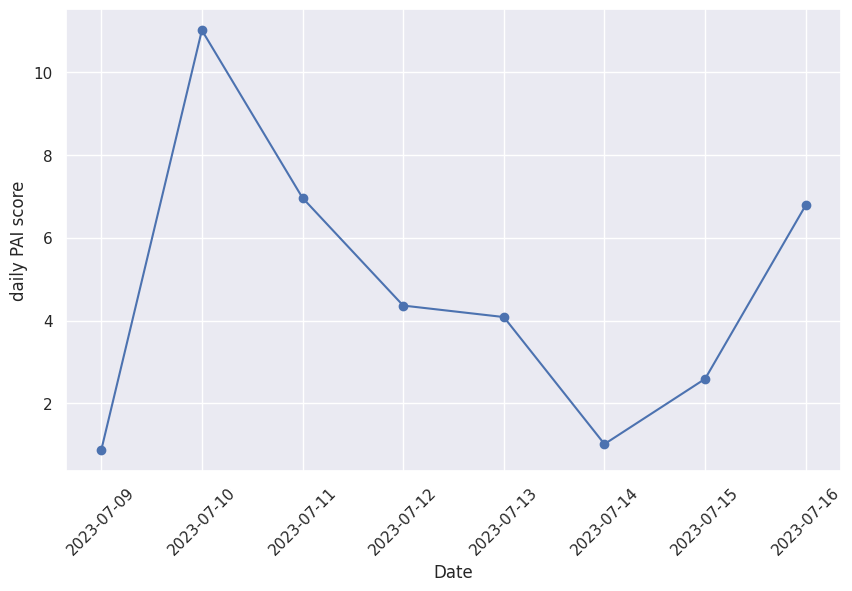

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(device_pai_v2['timestamp'], device_pai_v2['dailyPAI'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('daily PAI score')
#plt.title('Daily PAI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# print( device_pai_v2['dailyPAI'])
# print("\nData types of each column:")
# print(device_pai_v2['dailyPAI'].dtypes)

#df = pd.DataFrame({'dailyPAI': [0,1,2,3,4,5,6,7,8]})
# sum all values
#total = df.sum().sum()
#res_sum = sum([float(i) for i in df])
#print(total)
#print(res_sum)

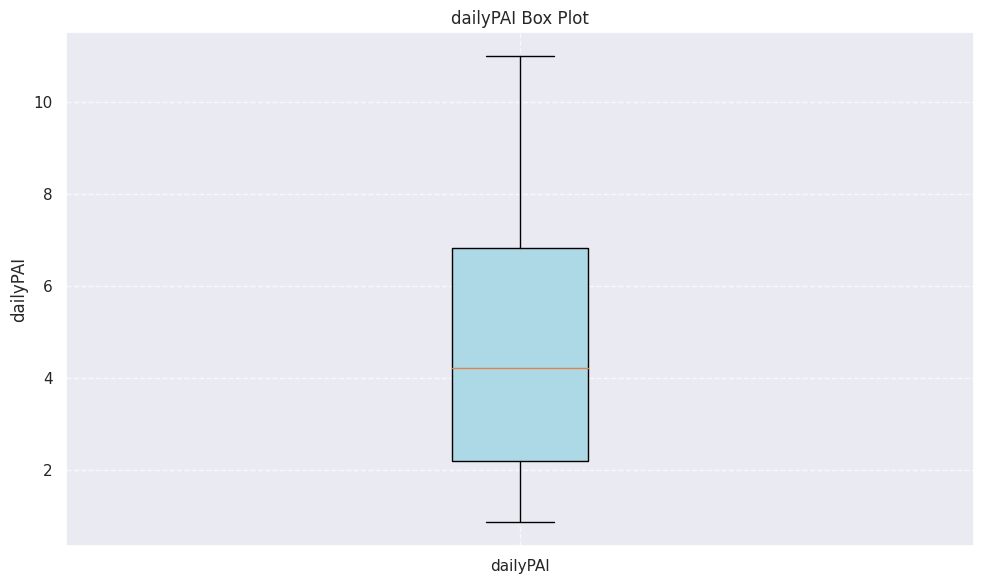

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(device_pai_v2['dailyPAI'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('dailyPAI')
plt.title('dailyPAI Box Plot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['dailyPAI'])
plt.tight_layout()
plt.show()

##totalPAI

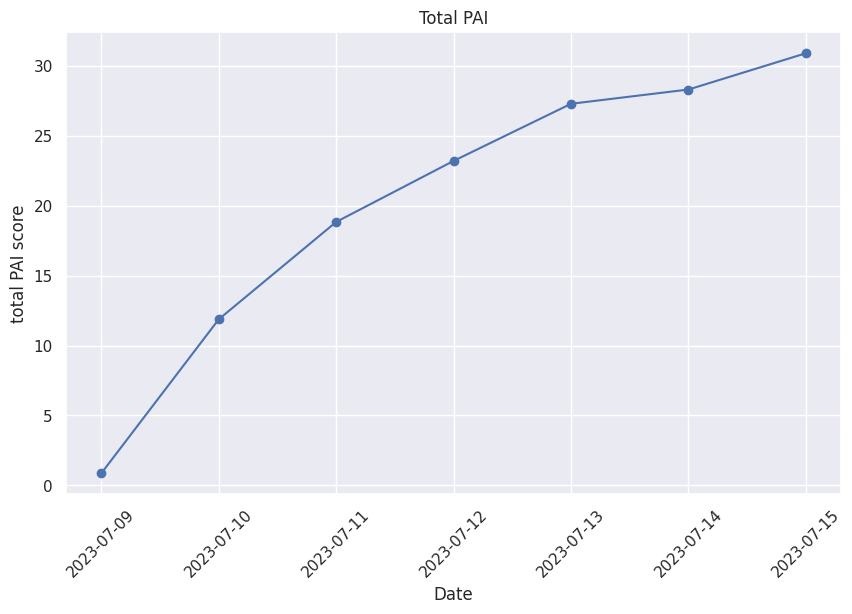

In [ ]:
plt.figure(figsize=(10, 6))
# without last column as we need only for one weeK: df2 = df.head(df.shape[0] - 1)
device_pai_v2=device_pai_v2.head(device_pai_v2.shape[0]-1)
plt.plot(device_pai_v2['timestamp'], device_pai_v2['totalPAI'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('total PAI score')
plt.title('Total PAI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



#spO2

In [ ]:
ClickSPO2 = tables_dict["ClickSPO2"]
print(ClickSPO2)
ClickSPO2 = ClickSPO2[["dateString","spo2"]]
ClickSPO2['dateString'] = pd.to_datetime(ClickSPO2['dateString'])
ClickSPO2['dateString'] = ClickSPO2['dateString'].dt.strftime('%Y-%m-%d')
#ClickSPO2 = ClickSPO2.groupby('dateString')['spo2'].sum().reset_index()

     rowID  generatedTime           dateString     timezone  deviceSource  \
0        1   1.688999e+12  2023-07-10 17:20:30  Asia/Riyadh           254   
1        2   1.689013e+12  2023-07-10 21:15:30  Asia/Riyadh           254   
2        3   1.689015e+12  2023-07-10 21:45:30  Asia/Riyadh           254   
3        4   1.689015e+12  2023-07-10 21:50:30  Asia/Riyadh           254   
4        5   1.689015e+12  2023-07-10 21:55:30  Asia/Riyadh           254   
..     ...            ...                  ...          ...           ...   
574    575   1.689602e+12  2023-07-17 16:55:30  Asia/Riyadh           254   
575    576   1.689602e+12  2023-07-17 17:00:30  Asia/Riyadh           254   
576    577   1.689603e+12  2023-07-17 17:10:30  Asia/Riyadh           254   
577    578   1.689605e+12  2023-07-17 17:40:30  Asia/Riyadh           254   
578    579   1.689605e+12  2023-07-17 17:45:30  Asia/Riyadh           254   

    subType  synchronized          deviceId              sn          appNam

<ipython-input-25-412bdbd3ec49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClickSPO2['dateString'] = pd.to_datetime(ClickSPO2['dateString'])
<ipython-input-25-412bdbd3ec49>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClickSPO2['dateString'] = ClickSPO2['dateString'].dt.strftime('%Y-%m-%d')


## Exporting

In [ ]:
# Export data as CSV
f="BloodOxygen"
csv_filename = path + f +"_data.csv"
ClickSPO2.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported BloodOxygen data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/BloodOxygen_data.csv


##Blotting

In [ ]:
ClickSPO2

,dateString,spo2
0,2023-07-10,99
1,2023-07-10,99
2,2023-07-10,94
3,2023-07-10,95
4,2023-07-10,95
...,...,...
574,2023-07-17,99
575,2023-07-17,99
576,2023-07-17,99
577,2023-07-17,99


In [ ]:
max=ClickSPO2.max(axis=0) # will return max value of each column
min=ClickSPO2.min(axis=0) # will return max value of each column
mean = ClickSPO2.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")


  


  


   ********** Maximum Values ********** 
 dateString    2023-07-17
spo2                  99
dtype: object

   ********** Average Values ********** 
 spo2    97.001727
dtype: float64

   ********** Minumum Values ********** 
 dateString    2023-07-10
spo2                  84
dtype: object

  


  



<ipython-input-28-660acf27409e>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = ClickSPO2.mean()


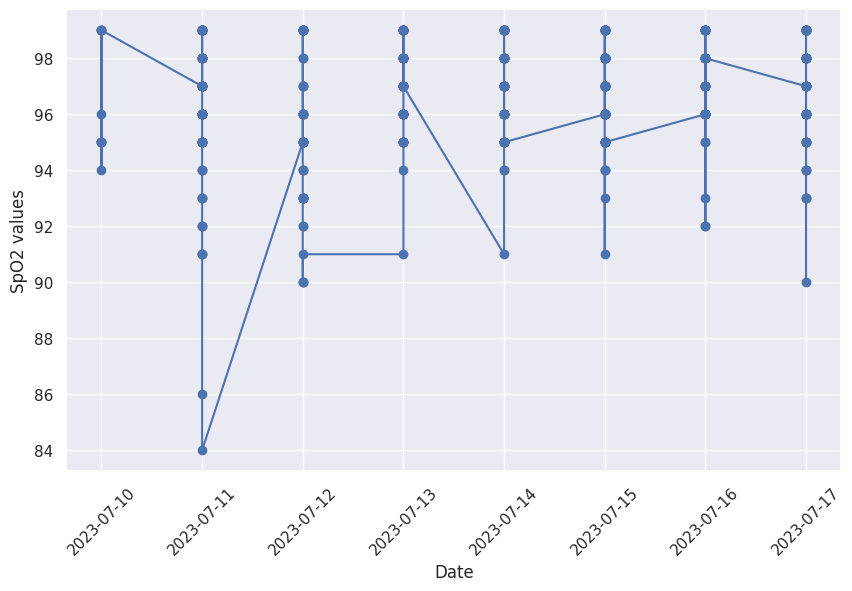

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ClickSPO2['dateString'], ClickSPO2['spo2'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('SpO2 values')
#plt.title('Timeseies for Blood Oxygen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


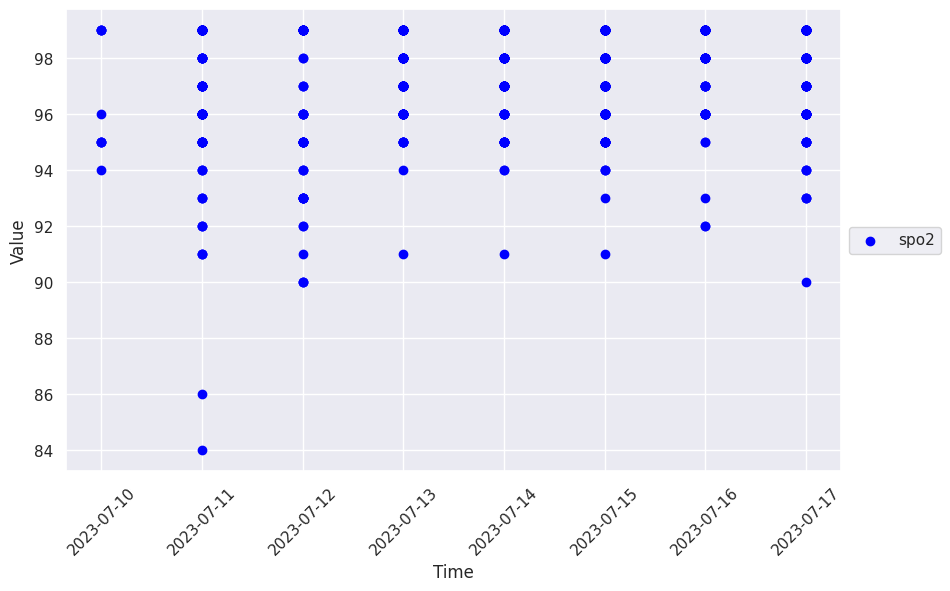

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(ClickSPO2['dateString'], ClickSPO2['spo2'], marker='o', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
legend_labels = ['spo2']

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side

#plt.title('SpO2 Trends Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



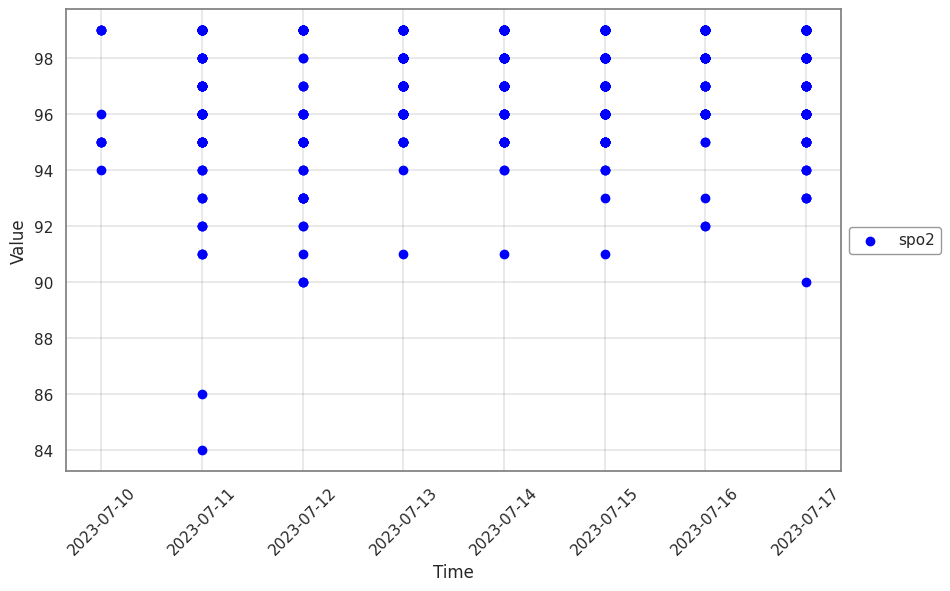

In [ ]:
plt.figure(figsize=(10, 6))


plt.scatter(ClickSPO2['dateString'], ClickSPO2['spo2'], marker='o', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
legend_labels = ['spo2']

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5),facecolor='white', edgecolor='grey')  # Placing legend on the side

#plt.title('SpO2 Trends Over Time')
plt.xticks(rotation=45)

# Customize the grid color and line style
plt.grid(color='grey', linestyle='-', linewidth=0.25)
# Add borders to the plot
ax = plt.gca()

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
# Set the background color
plt.gca().set_facecolor('white')

plt.show()


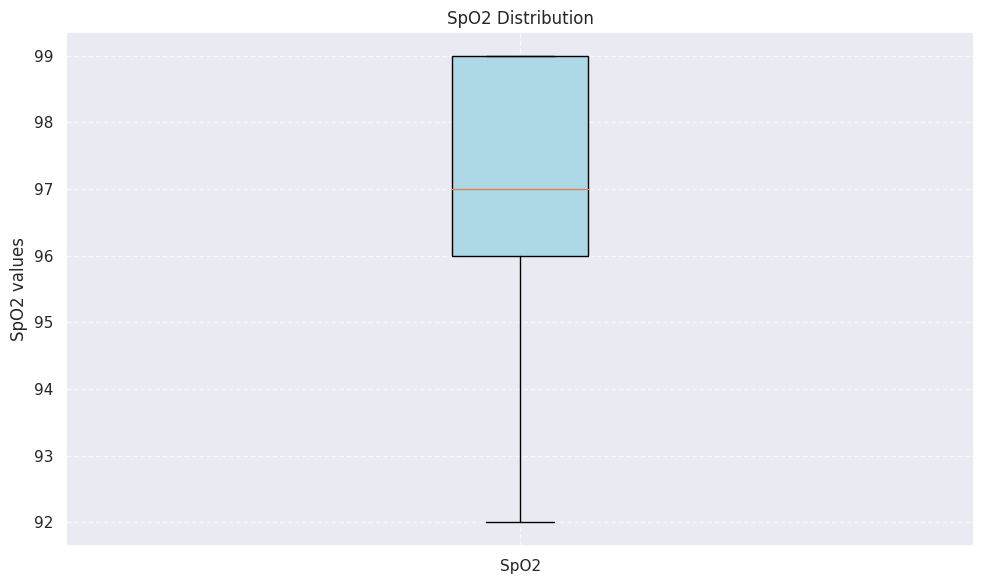

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(ClickSPO2['spo2'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('SpO2 values')
plt.title('SpO2 Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['SpO2'])  # Label the x-axis
plt.tight_layout()
plt.show()

#PressureRate

In [ ]:
PressureRateTable = tables_dict["PressureRateTable"]
PressureRateTable = PressureRateTable[["createTime","rate"]]
PressureRateTable['createTime'] = pd.to_datetime(PressureRateTable['createTime'], unit='s')
PressureRateTable['createTime'] = pd.to_datetime(PressureRateTable['createTime'])
PressureRateTable['createTime'] = PressureRateTable['createTime'].dt.strftime('%Y-%m-%d')
#PressureRateTable = PressureRateTable.groupby('createTime')['rate'].sum().reset_index()

<ipython-input-33-aee1c3097767>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PressureRateTable['createTime'] = pd.to_datetime(PressureRateTable['createTime'], unit='s')
<ipython-input-33-aee1c3097767>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PressureRateTable['createTime'] = pd.to_datetime(PressureRateTable['createTime'])
<ipython-input-33-aee1c3097767>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
# Export data as CSV
f="Stress_PressureRate"
csv_filename = path + f +"_data.csv"
PressureRateTable.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Stress_PressureRate data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/Stress_PressureRate_data.csv


In [ ]:
PressureRateTable

,createTime,rate
0,2023-07-10,53
1,2023-07-10,47
2,2023-07-10,42
3,2023-07-10,58
4,2023-07-10,42
...,...,...
658,2023-07-17,25
659,2023-07-17,27
660,2023-07-17,33
661,2023-07-17,39


In [ ]:
max=PressureRateTable.max(axis=0) # will return max value of each column
min=PressureRateTable.min(axis=0) # will return max value of each column
mean = PressureRateTable.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")


  


  


   ********** Maximum Values ********** 
 createTime    2023-07-17
rate                  72
dtype: object

   ********** Average Values ********** 
 rate    18.803922
dtype: float64

   ********** Minumum Values ********** 
 createTime    2023-07-10
rate                   1
dtype: object

  


  



<ipython-input-36-3d804f6c0300>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = PressureRateTable.mean()


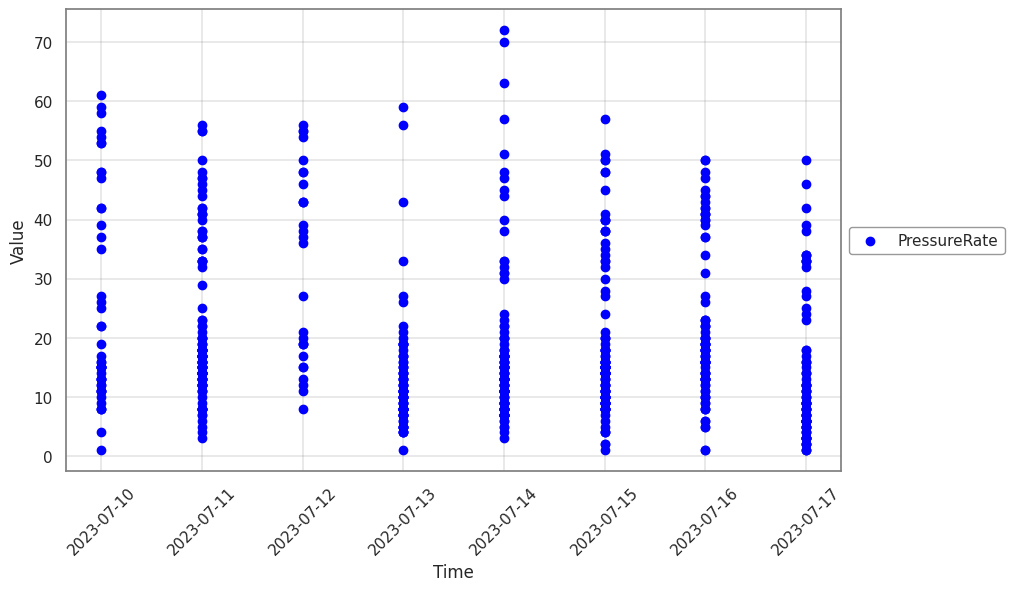

In [ ]:
# plt.figure(figsize=(10, 6))

# plt.scatter(PressureRateTable['createTime'], PressureRateTable['rate'], marker='o', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Value')
# #plt.title('Pressure Rate per Day')
# plt.xticks(rotation=45)
# # Show grid
# # Set the background color
# plt.gca().set_facecolor('white')

# plt.legend()
# plt.grid(True)

# plt.show()



# plt.figure(figsize=(10, 6))
# plt.scatter(PressureRateTable['createTime'], PressureRateTable['rate'], marker='o', color='blue')
# plt.xlabel('Time')
# plt.ylabel('Value')
# legend_labels = ['PressureRate']

# plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side

# #plt.title('SpO2 Trends Over Time')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()



plt.figure(figsize=(10, 6))
plt.scatter(PressureRateTable['createTime'], PressureRateTable['rate'], marker='o', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
legend_labels = ['PressureRate']

plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5),facecolor='white', edgecolor='grey')  # Placing legend on the side

#plt.title('SpO2 Trends Over Time')
plt.xticks(rotation=45)

# Customize the grid color and line style
plt.grid(color='grey', linestyle='-', linewidth=0.25)
# Add borders to the plot
ax = plt.gca()

plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

ax.spines['top'].set_color('grey')
ax.spines['right'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
# Set the background color
plt.gca().set_facecolor('white')

plt.show()


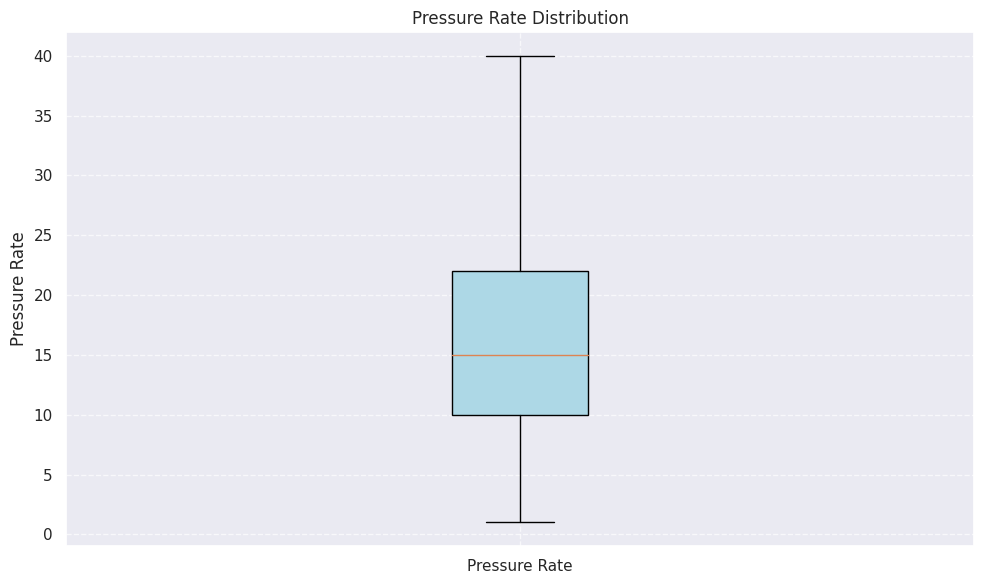

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(PressureRateTable['rate'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('Pressure Rate')
plt.title('Pressure Rate Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['Pressure Rate'])  # Label the x-axis
plt.tight_layout()
plt.show()

#Activity

In [ ]:
stepActivityStage = tables_dict["stepActivityStage"]
stepActivityStage = stepActivityStage[["userDate","stepCount","calories"]]
stepActivityStage['userDate'] = pd.to_datetime(stepActivityStage['userDate'], unit='s')
stepActivityStage['userDate'] = pd.to_datetime(stepActivityStage['userDate'])
stepActivityStage['userDate'] = stepActivityStage['userDate'].dt.strftime('%Y-%m-%d')
stepActivityStage = stepActivityStage.groupby('userDate')['stepCount','calories'].sum().reset_index()


<ipython-input-39-96f3d6602df2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stepActivityStage['userDate'] = pd.to_datetime(stepActivityStage['userDate'], unit='s')
<ipython-input-39-96f3d6602df2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stepActivityStage['userDate'] = pd.to_datetime(stepActivityStage['userDate'])
<ipython-input-39-96f3d6602df2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



## Exporting

In [ ]:
f="Activity"
csv_filename = path + f +"_data.csv"
stepActivityStage.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Activity data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/Activity_data.csv


##Blotting

In [ ]:
stepActivityStage

,userDate,stepCount,calories
0,2023-07-09,2233,70
1,2023-07-10,10522,294
2,2023-07-11,9146,258
3,2023-07-12,5377,197
4,2023-07-13,6617,212
5,2023-07-14,3507,115
6,2023-07-15,3922,107
7,2023-07-16,6715,189


In [ ]:
max=stepActivityStage.max(axis=0) # will return max value of each column
min=stepActivityStage.min(axis=0) # will return max value of each column
mean = stepActivityStage.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")


  


  


   ********** Maximum Values ********** 
 userDate     2023-07-16
stepCount         10522
calories            294
dtype: object

   ********** Average Values ********** 
 stepCount    6004.875
calories      180.250
dtype: float64

   ********** Minumum Values ********** 
 userDate     2023-07-09
stepCount          2233
calories             70
dtype: object

  


  



<ipython-input-42-69bf37af6aeb>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = stepActivityStage.mean()


##Blotting

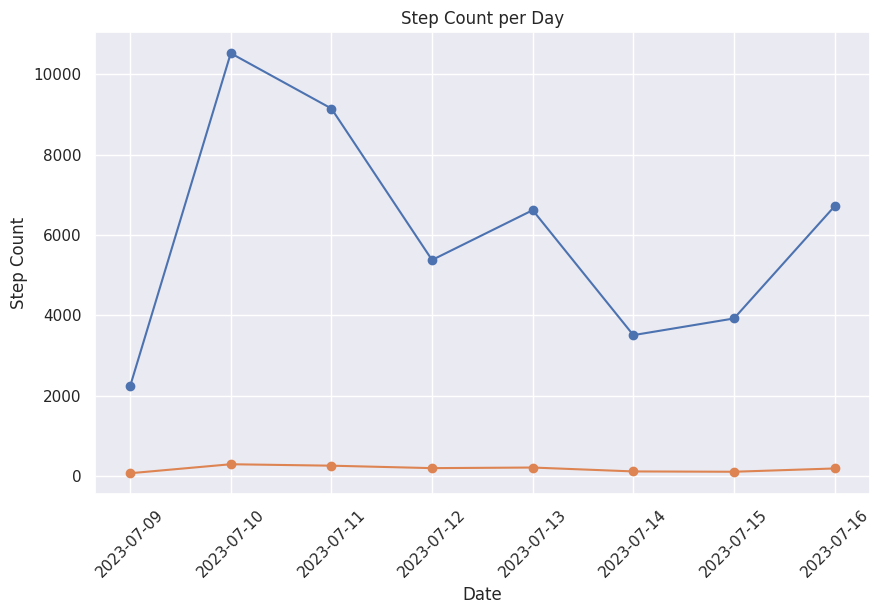

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stepActivityStage['userDate'], stepActivityStage['stepCount'], marker='o', linestyle='-')
plt.plot(stepActivityStage['userDate'], stepActivityStage['calories'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.title('Step Count per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

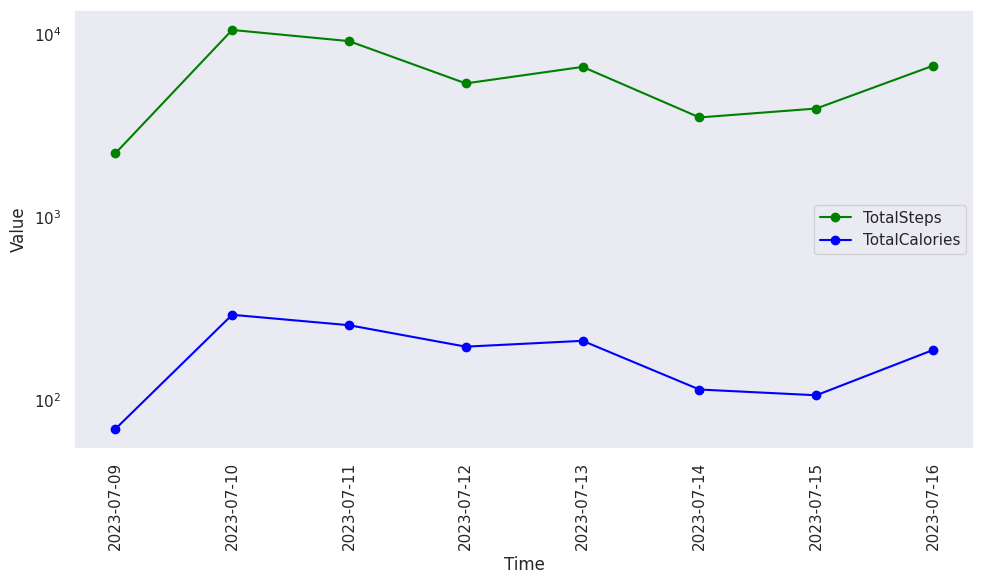

In [ ]:

# def plot_time_series_activity(data_frame, plot_total_steps=True, plot_total_calories=True, log_scale=False):
#     plt.figure(figsize=(10, 6))
#     if plot_total_steps:
#         plt.plot(data_frame['userDate'], data_frame['stepCount'], label='TotalSteps', marker='o')
#     if plot_total_calories:
#         plt.plot(data_frame['userDate'], data_frame['calories'], label='TotalCalories', marker='o')
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     #plt.title('TotalSteps and TotalCalories Over Time')
#     plt.legend()
#     plt.xticks(rotation=90)
#     if log_scale:
#         plt.yscale('log')  # Set y-axis to log scale
#     plt.tight_layout()
#     plt.show()



def plot_time_series_activity(data_frame, plot_total_steps=True, plot_total_calories=True, log_scale=False):
    plt.figure(figsize=(10, 6))
    if plot_total_steps:
        plt.plot(data_frame['userDate'], data_frame['stepCount'], label='TotalSteps', marker='o',color='green')
    if plot_total_calories:
        plt.plot(data_frame['userDate'], data_frame['calories'], label='TotalCalories', marker='o',color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    #plt.title('TotalSteps and TotalCalories Over Time')
    plt.legend()
    plt.xticks(rotation=90)
    if log_scale:
        plt.yscale('log')  # Set y-axis to log scale
    plt.tight_layout()
    plt.show()


plot_time_series_activity(stepActivityStage, plot_total_steps=True, plot_total_calories=True, log_scale=True)


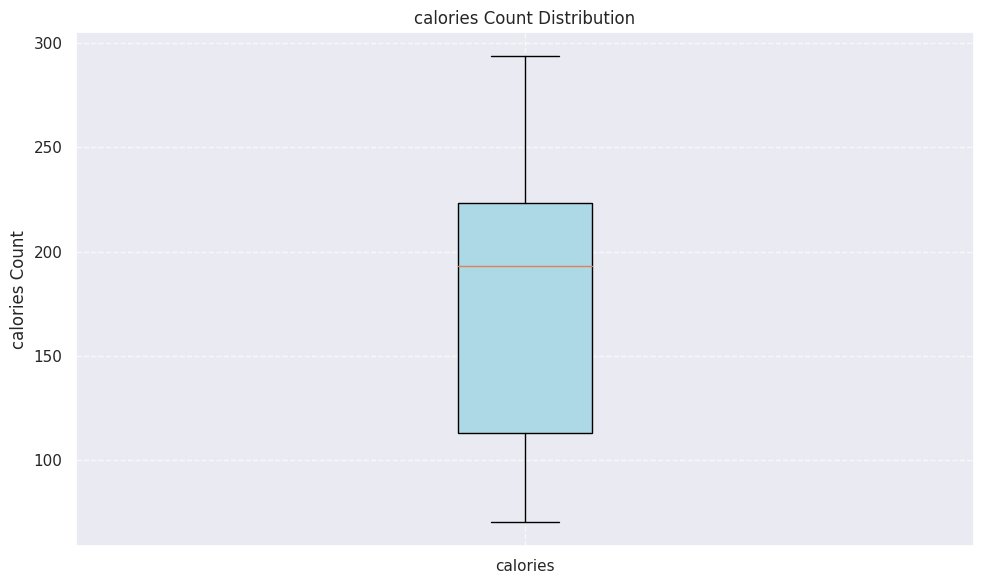

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(stepActivityStage['calories'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('calories Count')
plt.title('calories Count Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['calories'])  # Label the x-axis
plt.tight_layout()
plt.show()

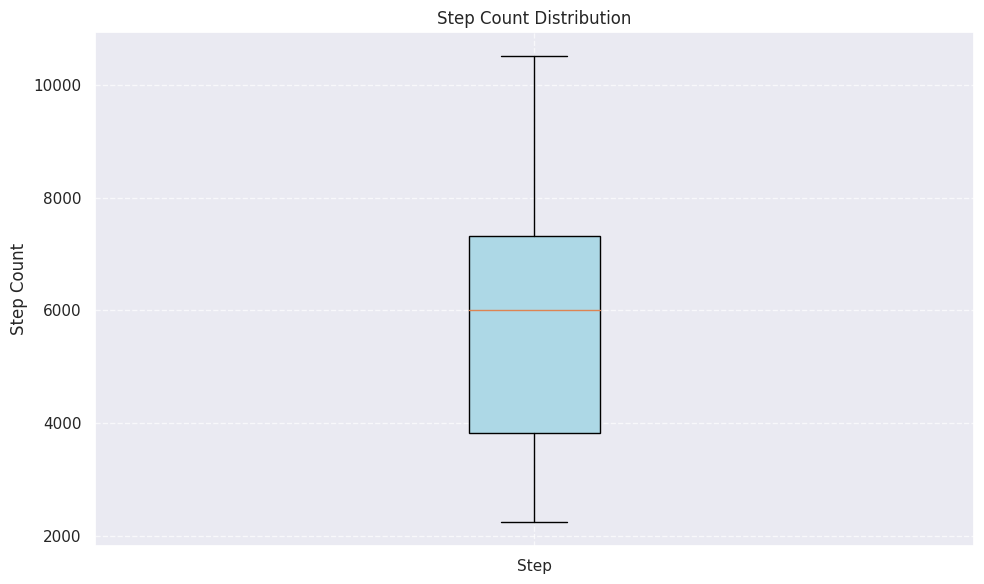

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(stepActivityStage['stepCount'], vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, showfliers=False)
plt.ylabel('Step Count')
plt.title('Step Count Distribution')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks([1], ['Step'])  # Label the x-axis
plt.tight_layout()
plt.show()

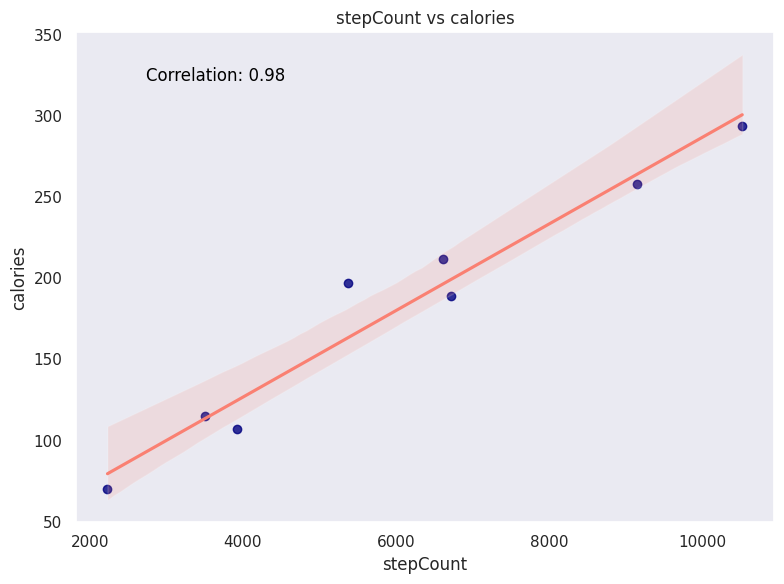

In [ ]:
import seaborn as sns

def plot_scatter_with_regression(data_frame, x_column, y_column):
    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  # Set a pastel color palette
    # Scatter Plot with Regression Line
    sns.regplot(x=x_column, y=y_column, data=data_frame, scatter_kws={'color': '#000080'}, line_kws={'color': 'salmon'})
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'{x_column} vs {y_column}')
    plt.tight_layout()
    # Calculate the correlation coefficient
    correlation = data_frame[x_column].corr(data_frame[y_column])
    correlation_text = f'Correlation: {correlation:.2f}'
    # Display correlation coefficient on the plot
    plt.annotate(correlation_text, xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12, color='black')
    plt.show()
plot_scatter_with_regression(stepActivityStage, x_column='stepCount', y_column='calories')

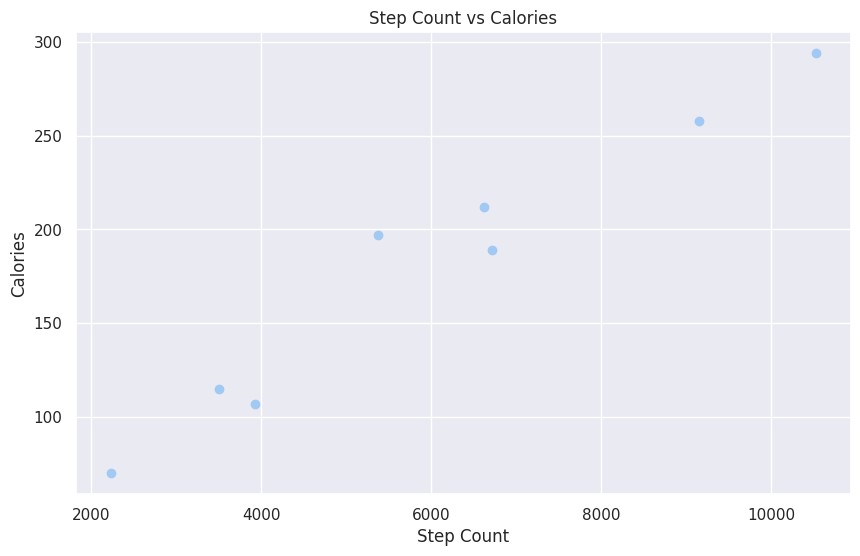

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(stepActivityStage['stepCount'], stepActivityStage['calories'], marker='o')
plt.xlabel('Step Count')
plt.ylabel('Calories')
plt.title('Step Count vs Calories')
plt.grid(True)
plt.show()

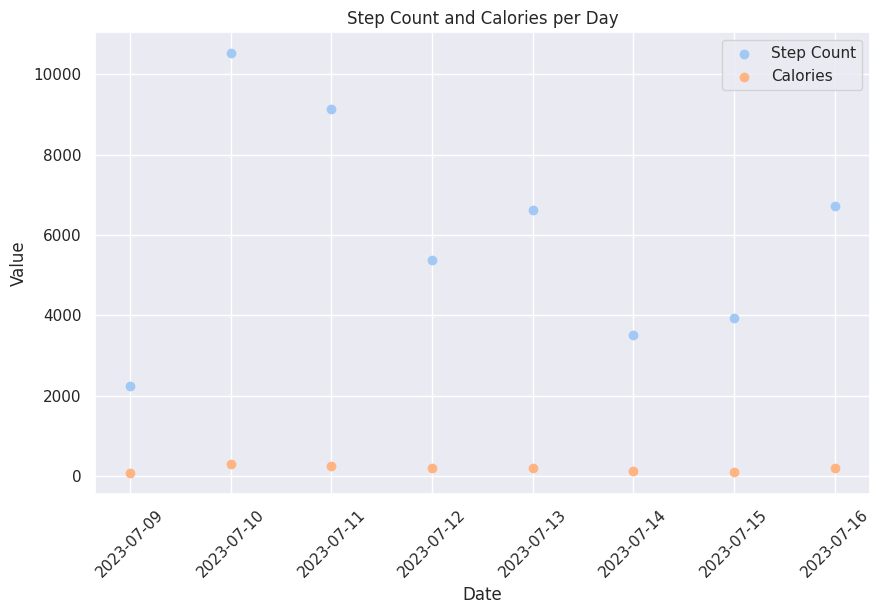

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(stepActivityStage['userDate'], stepActivityStage['stepCount'], label='Step Count', marker='o')
plt.scatter(stepActivityStage['userDate'], stepActivityStage['calories'], label='Calories', marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Step Count and Calories per Day')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-64-ff80ff3a9442>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_frame.loc[:, timestamp_col] = pd.to_datetime(data_frame.loc[:, timestamp_col])


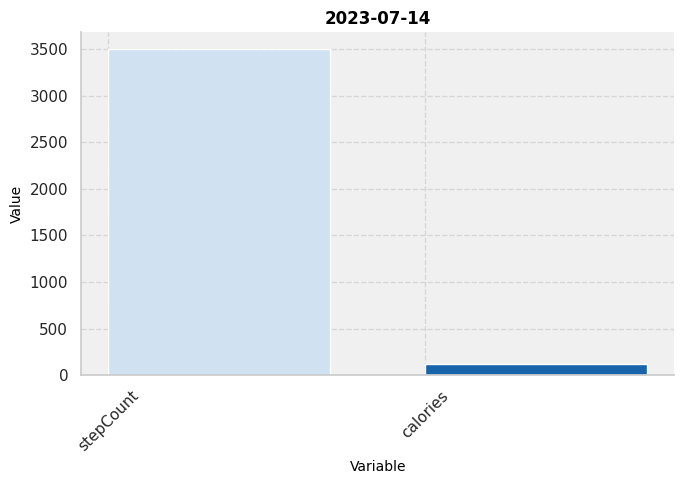

In [ ]:

selected_date = pd.to_datetime('2023-07-14').date()  # Replace with the date you want to plot
variables_to_plot = ['stepCount', 'calories']
plot_variables_for_date(stepActivityStage, timestamp_col='userDate', selected_date=selected_date, variables=variables_to_plot, log_scale=False)

#HeartRate

In [ ]:
activitySummary=tables_dict["activitySummary"]


In [ ]:
print(activitySummary.head())


   rowID  dayTimestamp dateStr timeZone  deviceType deviceID  stepCount  \
0      1    1688936400    None     None           1                3098   
1      2    1689022800    None     None           1               13111   
2      3    1689109200    None     None           1               12171   
3      4    1689195600    None     None           1     None       7539   
4      5    1689282000    None     None           1     None       9184   

   runCount  frontFootCount  walkTime  ...  noWearDuration  todayMaxHR  \
0         0               0        49  ...               0         114   
1         0               0       148  ...               0          89   
2         0               0       148  ...               0           0   
3         0               0        96  ...               0          84   
4         0               0       122  ...               0          91   

   todayMaxHRGenerateTimeStamp  todayMaxHRGenerateTimeZone     algv  \
0                   1689016444   

In [ ]:
# import datetime

# timestamp = 1688936400
# dt = datetime.datetime.fromtimestamp(timestamp)

# print("Date and Time:", dt)

In [ ]:
heart_data=tables_dict["activitySummary"]
heart_data=heart_data[["dayTimestamp","todayMaxHR","restHeartRate"]]
timestamp = heart_data['dayTimestamp']
converted_timestamps = timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x))
heart_data['dayTimestamp']= converted_timestamps
heart_data['dayTimestamp'] = heart_data['dayTimestamp'].dt.strftime('%Y-%m-%d')


<ipython-input-53-5347dc883dea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['dayTimestamp']= converted_timestamps
<ipython-input-53-5347dc883dea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['dayTimestamp'] = heart_data['dayTimestamp'].dt.strftime('%Y-%m-%d')


In [ ]:
heart_data

,dayTimestamp,todayMaxHR,restHeartRate
0,2023-07-09,114,0
1,2023-07-10,89,59
2,2023-07-11,0,58
3,2023-07-12,84,60
4,2023-07-13,91,59
5,2023-07-14,82,57
6,2023-07-16,76,55
7,2023-07-15,0,57


In [ ]:
#Remove zero values
heart_data=heart_data[(heart_data['todayMaxHR'] != 0) & (heart_data['restHeartRate'] != 0)]

In [ ]:
max=heart_data.max(axis=0) # will return max value of each column
min=heart_data.min(axis=0) # will return max value of each column
mean = heart_data.mean()

print("\n  \n")
print("\n  \n")
print("\n   ********** Maximum Values ********** \n", max)
print("\n   ********** Average Values ********** \n", mean)
print("\n   ********** Minumum Values ********** \n", min)
print("\n  \n")
print("\n  \n")



  


  


   ********** Maximum Values ********** 
 dayTimestamp     2023-07-16
todayMaxHR               91
restHeartRate            60
dtype: object

   ********** Average Values ********** 
 todayMaxHR       84.4
restHeartRate    58.0
dtype: float64

   ********** Minumum Values ********** 
 dayTimestamp     2023-07-10
todayMaxHR               76
restHeartRate            55
dtype: object

  


  



<ipython-input-56-624bed1f2895>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = heart_data.mean()


##Exporting

In [ ]:
f="Heart"
csv_filename = path + f +"_data.csv"
heart_data.to_csv(csv_filename, index=False)
print(f"Exported {f} data to {csv_filename}")

Exported Heart data to /content/drive/MyDrive/WearablesData/DB/AmazfitB/Features/Heart_data.csv


##Blotting

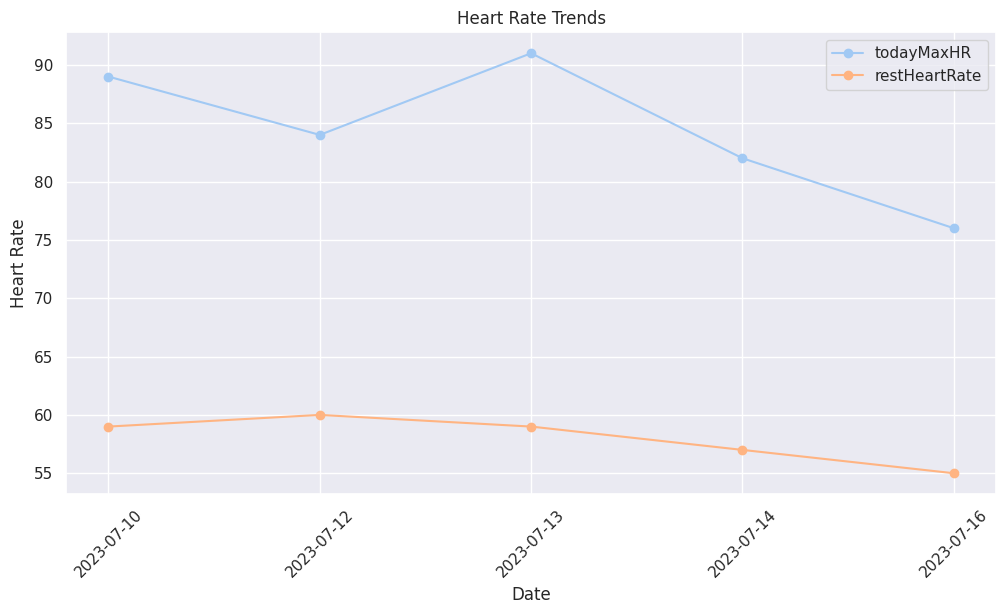

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(heart_data['dayTimestamp'], heart_data['todayMaxHR'], marker='o', linestyle='-', label='todayMaxHR')
plt.plot(heart_data['dayTimestamp'], heart_data['restHeartRate'], marker='o', linestyle='-', label='restHeartRate')
plt.xlabel('Date')
plt.ylabel('Heart Rate')
plt.title('Heart Rate Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

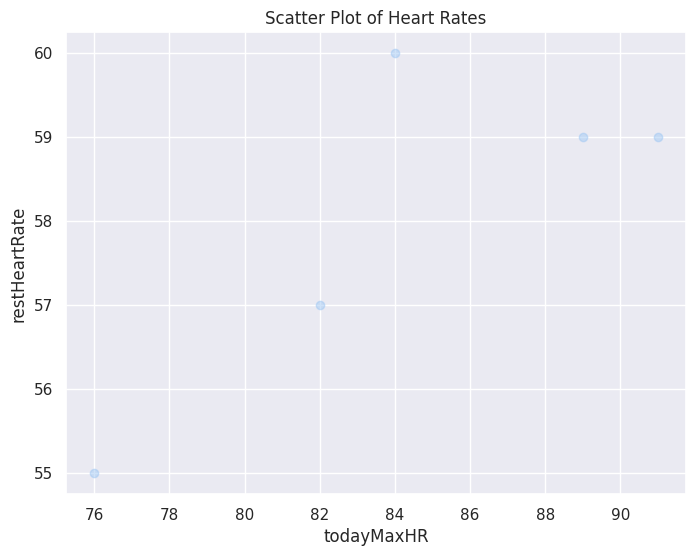

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(heart_data['todayMaxHR'], heart_data['restHeartRate'], marker='o', alpha=0.5)
plt.xlabel('todayMaxHR')
plt.ylabel('restHeartRate')
plt.title('Scatter Plot of Heart Rates')
plt.grid(True)
plt.show()

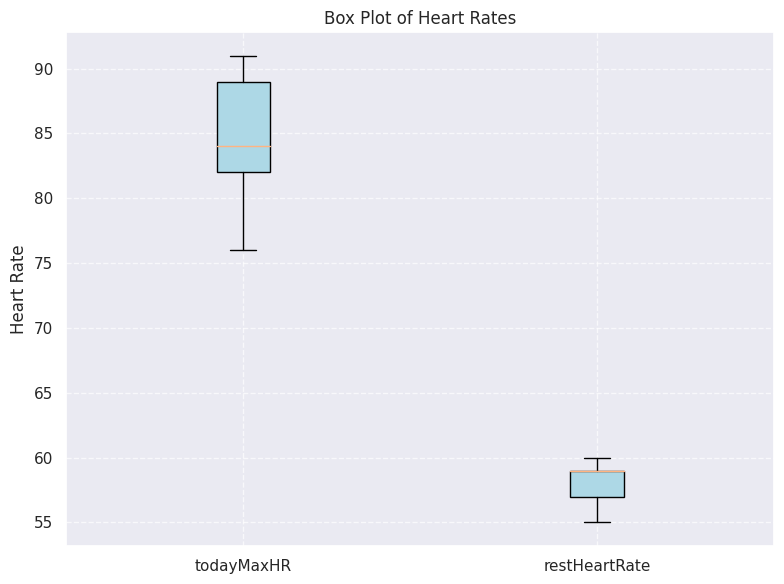

In [ ]:
plt.figure(figsize=(8, 6))
data_to_plot = [heart_data['todayMaxHR'], heart_data['restHeartRate']]
plt.boxplot(data_to_plot, vert=True, patch_artist=True, boxprops={'facecolor': 'lightblue'}, labels=['todayMaxHR', 'restHeartRate'], showfliers=False)
plt.ylabel('Heart Rate')
plt.title('Box Plot of Heart Rates')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

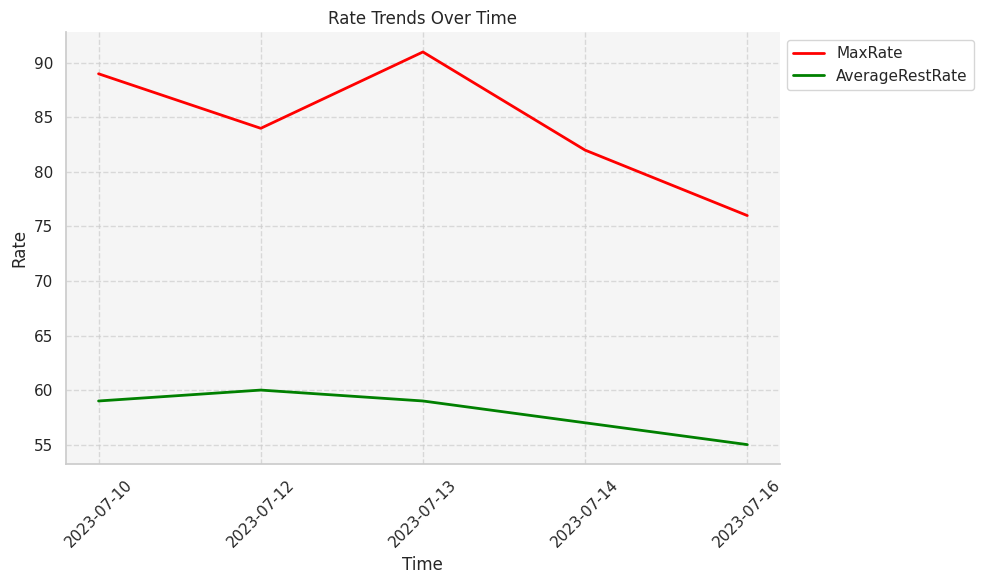

In [ ]:
def plot_rate_trends(data_frame, plot_max=True, plot_min=False, plot_avg=True):
    sns.set(style="whitegrid")
    # Sort the DataFrame by timestamp
    data_frame = data_frame.sort_values(by='dayTimestamp')
    plt.figure(figsize=(10, 6))
    if plot_max:
        plt.plot(data_frame['dayTimestamp'], data_frame['todayMaxHR'], label='MaxRate', color='red', linewidth=2)
    #if plot_min:
    #    plt.plot(data_frame['dayTimestamp'], data_frame['MinRate'], label='MinRate', color='blue', linewidth=2)
    if plot_avg:
        plt.plot(data_frame['dayTimestamp'], data_frame['restHeartRate'], label='AverageRestRate', color='green', linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Rate')
    plt.title('Rate Trends Over Time')
    if plot_max and plot_avg:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.7)
    ax = plt.gca()
    ax.set_facecolor('#F5F5F5')
    sns.despine()
    plt.show()

plot_rate_trends(heart_data, plot_max=True, plot_min=False, plot_avg=True)

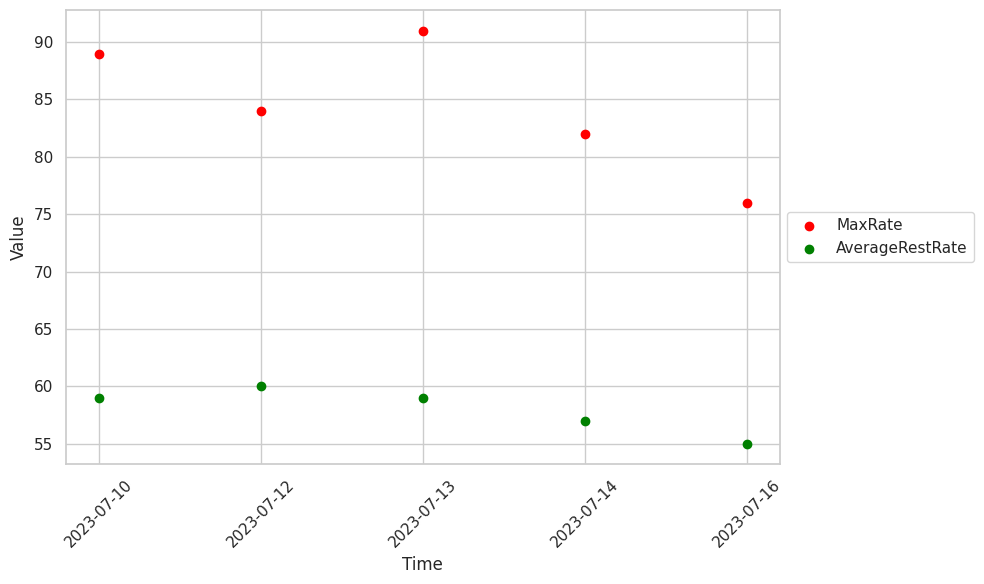

In [ ]:

def heart_colored_scatter_plot(data_frame, x_column, y_columns, colors, title, x_label, y_label, legend_labels):
    plt.figure(figsize=(10, 6))
    for y_column, color, legend_label in zip(y_columns, colors, legend_labels):
        plt.scatter(data_frame[x_column], data_frame[y_column], color=color, label=legend_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placing legend on the side
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

x_column = 'dayTimestamp'
y_columns = ['todayMaxHR', 'restHeartRate']
colors = ['red', 'green']
legend_labels = ['MaxRate', 'AverageRestRate']
#title = 'Scatter Plot with Different Variables'
title=""
x_label = 'Time'
y_label = 'Value'
# Create the scatter plot using the function
heart_colored_scatter_plot(heart_data, x_column, y_columns, colors, title, x_label, y_label, legend_labels)

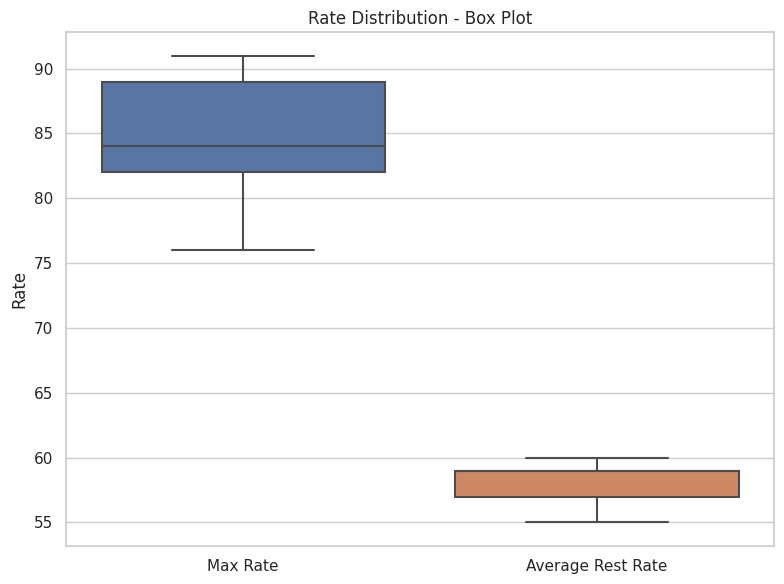

In [ ]:

def plot_box_plots_heart(data_frame, plot_max=True, plot_min=False, plot_avg=True):
    sns.set(style="whitegrid")
    box_plot_data = []
    # Create a dictionary to map column names to their labels
    column_labels = {
        'todayMaxHR': 'Max Rate',
        #'MinRate': 'Min Rate',
        'restHeartRate': 'Average Rest Rate'
    }
    if plot_max:
        box_plot_data.append(data_frame['todayMaxHR'])
    #if plot_min:
    #    box_plot_data.append(data_frame['MinRate'])
    if plot_avg:
        box_plot_data.append(data_frame['restHeartRate'])
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=box_plot_data)
    plt.ylabel('Rate')
    plt.title('Rate Distribution - Box Plot')
    # Set x-axis tick labels using the column labels dictionary
    plt.xticks(range(len(box_plot_data)), [column_labels[column] for column in data_frame.columns if column in column_labels], rotation=0)
    plt.tight_layout()
    plt.show()


plot_box_plots_heart(heart_data, plot_max=True, plot_min=False, plot_avg=True)